Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC3641 - Aprendizaje Automático Basado en Grafos <br>
Segundo Semestre 2025<br>


<h1><center> Tarea 1: Modelos de grafos  </center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 8 de septiembre

---

## Indicaciones

Se debe entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se asignará puntaje por el código implementado y los comentarios asociados a resultados.
- El notebook debe tener todas las celdas de código ejecutadas.
- Cualquier instancia de copia resultará en un 1,1 como nota de curso.
- Esta tarea **NO** requiere el uso de GPU.

---

# Integrantes del grupo

* Estudiante 1: Itzae Flores
* Estudiante 2: Matías Vidal

# Librerías

In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx

# Importa aquí las librerías que vayas a utilizar

# Parte 1: Análisis red de colaboración (20 puntos)

En esta sección se debe desarrollar un análisis descriptivo con las principales características asociadas a las siguietes redes:
* **General Relativity and Quantum Cosmology collaboration network:** ca-GrQc.txt
* **Erdös Number:** Erdos982.txt

Suponga que las redes son no dirigidas.

In [3]:
df_asia = pd.read_csv("lastfm_asia_edges.csv")

df_asia.head()


node_1  node_2
0       0     747
1       1    4257
2       1    2194
3       1     580
4       1    6478

## 1.1 Medidas básicas (10 puntos)


Grafique las redes de colaboraciones y determine las siguientes medidas descriptivas para cada caso si se puede:

* Número de nodos
* Número de componentes
* Número de aristas
* Grado promedio
* Diametro
* Camino mínimo promedio

¿Qué características diferencian a estas redes? Interprete sus resultados en el contexto del problema.

**Observación**

En caso de reconocer dos o más componentes asociados a una red, solo trabaje con la de mayor tamaño .


**Respuesta:**

ca-GrQc

In [28]:
fh = open("ca-GrQc.txt", "rb")
G = nx.read_edgelist(fh)
fh.close()


#cantidad de nodos y edges
print(G)

#cantidad de componentes

num_components = nx.number_connected_components(G)
print("Número de componentes conexas:", num_components)


Graph with 5244 nodes and 14497 edges
Número de componentes conexas: 356


c:\Users\itzae\.julia\conda\3\x86_64\lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
C:\Users\itzae\AppData\Local\Temp\ipykernel_20360\2622101112.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")


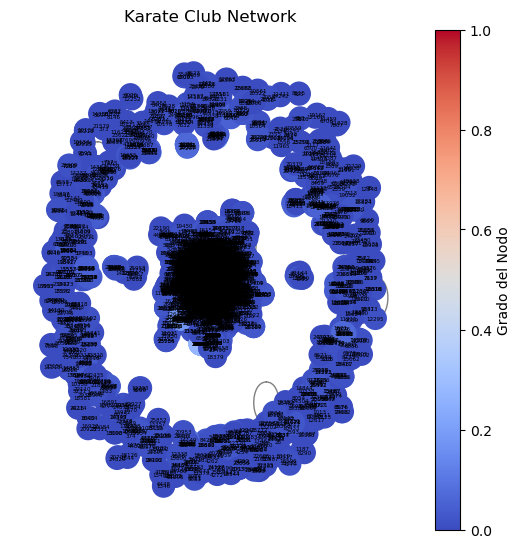

In [26]:
node_degrees = dict(G.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)

colors = plt.cm.coolwarm(normalized_degrees)


pos = nx.spring_layout(G)  # Posiciones de los nodos

plt.figure(figsize=(5, 5))
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=250, cmap=plt.cm.coolwarm, edge_color='gray', font_size=4)
plt.title("Karate Club Network")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()

In [8]:
# Información básica del grafo
num_nodos = G.number_of_nodes()  # Número de nodos
num_aristas = G.number_of_edges()  # Número de aristas
grados_nodos = dict(G.degree())  # Grado de cada nodo
grado_promedio = sum(grados_nodos.values()) / num_nodos  # Grado promedio
denso = nx.density(G)  # Densidad del grafo
componentes_conectados = nx.number_connected_components(G)  # Número de componentes conectados
#camino_minimo_promedio = dict(nx.average_shortest_path_length(G))  # Camino minimo promedio

# Información sobre la estructura del grafo
es_conexo = nx.is_connected(G)  # Verificar si el grafo es conexo
diámetro = nx.diameter(G) if es_conexo else 'N/A'  # Diámetro del grafo si es conexo
longitud_media_caminos = nx.average_shortest_path_length(G) if es_conexo else 'N/A'  # Longitud media de los caminos más cortos si es conexo
coef_clustering = nx.average_clustering(G)  # Coeficiente de agrupamiento promedio

# Mostrar la información
print(f"Número de nodos: {num_nodos}")
print(f"Número de aristas: {num_aristas}")
print(f"Componentes conectados: {componentes_conectados}")
print(f"Es conexo: {es_conexo}")
print(f"Diámetro del grafo: {diámetro}")
#grado promedio
print("Grado promedio:", grado_promedio)
print("No se puede calcular el camino mínimo promedio con la función, porque no es conexo")


Número de nodos: 5244
Número de aristas: 14497
Componentes conectados: 356
Es conexo: False
Diámetro del grafo: N/A
Grado promedio: 5.528985507246377
No se puede calcular el camino mínimo promedio con la función, porque no es conexo


Red Erdos

In [11]:
fh = open("Erdos982.txt", "rb")
G_erdos = nx.read_edgelist(fh)
fh.close()


#cantidad de nodos y edges
print(G_erdos)

#cantidad de componentes

num_components = nx.number_connected_components(G_erdos)
print("Número de componentes conexas:", num_components)

Graph with 4964 nodes and 7376 edges
Número de componentes conexas: 18


c:\Users\itzae\.julia\conda\3\x86_64\lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
C:\Users\itzae\AppData\Local\Temp\ipykernel_28120\3745647376.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")


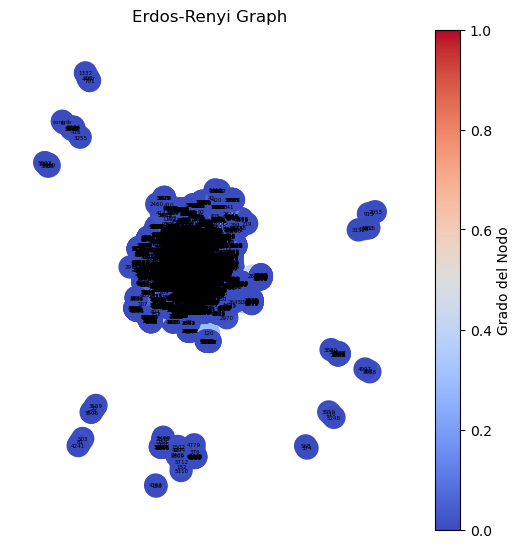

In [ ]:
node_degrees = dict(G_erdos.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)

colors = plt.cm.coolwarm(normalized_degrees)


pos = nx.spring_layout(G_erdos)  # Posiciones de los nodos

plt.figure(figsize=(5, 5))
nx.draw(G_erdos, pos, node_color=colors, with_labels=True, node_size=250, cmap=plt.cm.coolwarm, edge_color='gray', font_size=4)
plt.title("Erdos-Renyi Graph")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()



In [13]:
# Información básica del grafo
num_nodos = G_erdos.number_of_nodes()  # Número de nodos
num_aristas = G_erdos.number_of_edges()  # Número de aristas
grados_nodos = dict(G_erdos.degree())  # Grado de cada nodo
grado_promedio = sum(grados_nodos.values()) / num_nodos  # Grado promedio
denso = nx.density(G_erdos)  # Densidad del grafo
componentes_conectados = nx.number_connected_components(G_erdos)  # Número de componentes conectados
#camino_minimo_promedio = dict(nx.average_shortest_path_length(G_erdos))  # Camino minimo promedio

# Información sobre la estructura del grafo
es_conexo = nx.is_connected(G_erdos)  # Verificar si el grafo es conexo
diámetro = nx.diameter(G_erdos) if es_conexo else 'N/A'  # Diámetro del grafo si es conexo
longitud_media_caminos = nx.average_shortest_path_length(G_erdos) if es_conexo else 'N/A'  # Longitud media de los caminos más cortos si es conexo
coef_clustering = nx.average_clustering(G_erdos)  # Coeficiente de agrupamiento promedio

# Mostrar la información
print(f"Número de nodos: {num_nodos}")
print(f"Número de aristas: {num_aristas}")
print(f"Componentes conectados: {componentes_conectados}")
print(f"Es conexo: {es_conexo}")
print(f"Diámetro del grafo: {diámetro}")
#grado promedio
print("Grado promedio:", grado_promedio)
print("No se puede calcular el camino mínimo promedio con la función, porque no es conexo")


Número de nodos: 4964
Número de aristas: 7376
Componentes conectados: 18
Es conexo: False
Diámetro del grafo: N/A
Grado promedio: 2.9717969379532634
No se puede calcular el camino mínimo promedio con la función, porque no es conexo


## 1.2 Evaluación de nodos (5 puntos)

Investigue y describa las siguientes métricas:

* degree centrality: mide la proporción de links directos que un nodo individual tiene con otros nodos en la red, respecto a la cantidad total de nodos en la red. La fórmula calcula el numero de links directos del nodo N, divido en el número máximo de conexiones posibles (n-1), siendo n la cantidad de nodos.

* closeness centrality: mide qué tan cerca se encuentra un nodo de todos los demás nodos en la red, considerando la suma de las distancias mínimas a cada uno. Se interpreta como la capacidad de un nodo para llegar rápidamente al resto. La fórmula calcula el número de nodos alcanzables (n-1) dividido por la suma de las distancias más cortas desde el nodo  N hacia todos los demás.

* betweenness centrality: mide la proporción de veces que un nodo actúa como “puente” o intermediario en los caminos más cortos entre otros pares de nodos. Refleja la importancia de un nodo en el control del flujo de información dentro de la red. La fórmula cuenta el número de caminos más cortos entre dos nodos que pasan por el nodo v, dividido por el número total de caminos más cortos entre esos dos nodos:

¿En qué se diferencian?

Degree centrality mide la cantidad de conexiones directas de un nodo y su popularidad local. Closeness centrality mide la eficiencia con la que un nodo puede alcanzar a todos los demás a través de caminos cortos. Betweenness centrality mide el grado en que un nodo actúa como intermediario en los caminos más cortos y refleja su influencia en el flujo de información en la red.

Calcule las métricas para cada red y grafique su distribución. Comente.

Para cada caso, ¿qué nodos son los más relevantes según el criterio de centralidad?

**Respuesta:**

In [14]:
#red ca

#degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)
#closeness centrality
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:", closeness_centrality)
#betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness_centrality)




Degree Centrality: {'FromNodeId': 0.00019073049780659929, 'ToNodeId': 0.00019073049780659929, '3466': 0.0015258439824527943, '937': 0.0009536524890329964, '5233': 0.00038146099561319857, '8579': 0.0009536524890329964, '10310': 0.002479496471485791, '15931': 0.0019073049780659929, '17038': 0.003242418462712188, '18720': 0.0005721914934197979, '19607': 0.0007629219912263971, '1854': 0.0015258439824527943, '4583': 0.0005721914934197979, '9572': 0.006484836925424376, '10841': 0.0013351134846461949, '13056': 0.0019073049780659929, '14982': 0.00038146099561319857, '16310': 0.003242418462712188, '19640': 0.004768262445164982, '23855': 0.0015258439824527943, '24372': 0.00019073049780659929, '24814': 0.004005340453938585, '5052': 0.005531184436391379, '899': 0.0005721914934197979, '1796': 0.00038146099561319857, '2287': 0.0026702269692923898, '3096': 0.0022887659736791914, '3386': 0.002098035475872592, '4472': 0.0007629219912263971, '5346': 0.0038146099561319857, '5740': 0.00019073049780659929,


=== DEGREE CENTRALITY ===
Valor máximo: 0.0123
Valor mínimo: 0.0002
Promedio: 0.0006
Desviación estándar: 0.0013
Top 3 nodos:
  1. Nodo 426: 0.0123
  2. Nodo 438: 0.0121
  3. Nodo 244: 0.0117

=== CLOSENESS CENTRALITY ===
Valor máximo: 0.2722
Valor mínimo: 0.0002
Promedio: 0.1788
Desviación estándar: 0.0318
Top 3 nodos:
  1. Nodo 417: 0.2722
  2. Nodo 415: 0.2709
  3. Nodo 438: 0.2673

=== BETWEENNESS CENTRALITY ===
Valor máximo: 0.0598
Valor mínimo: 0.0000
Promedio: 0.0009
Desviación estándar: 0.0036
Top 3 nodos:
  1. Nodo 175: 0.0598
  2. Nodo 417: 0.0573
  3. Nodo 415: 0.0569


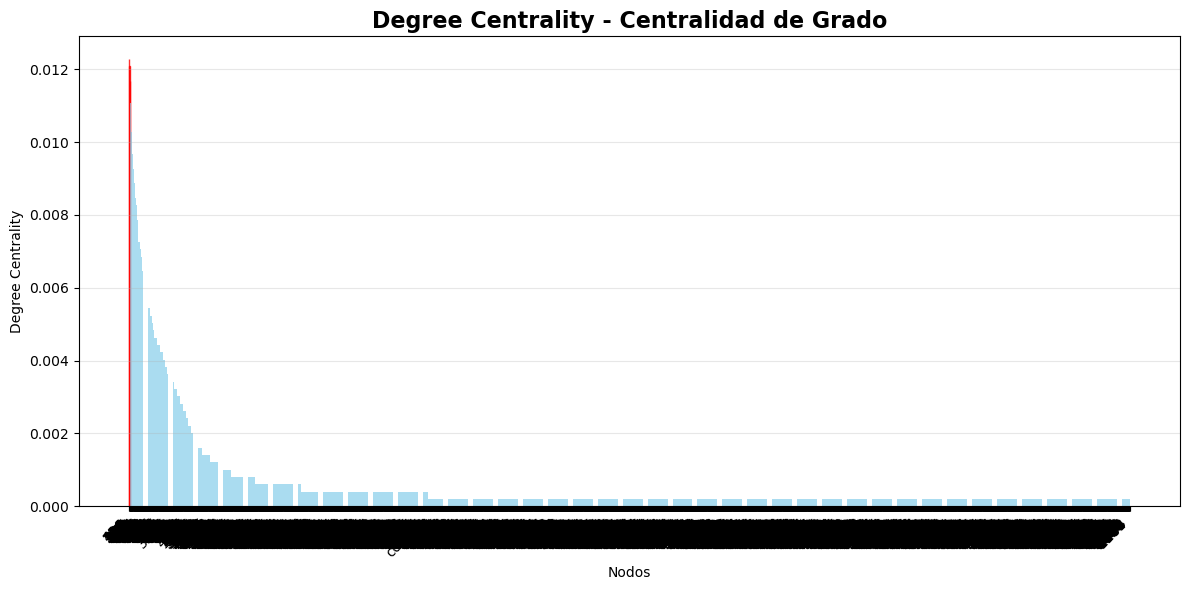

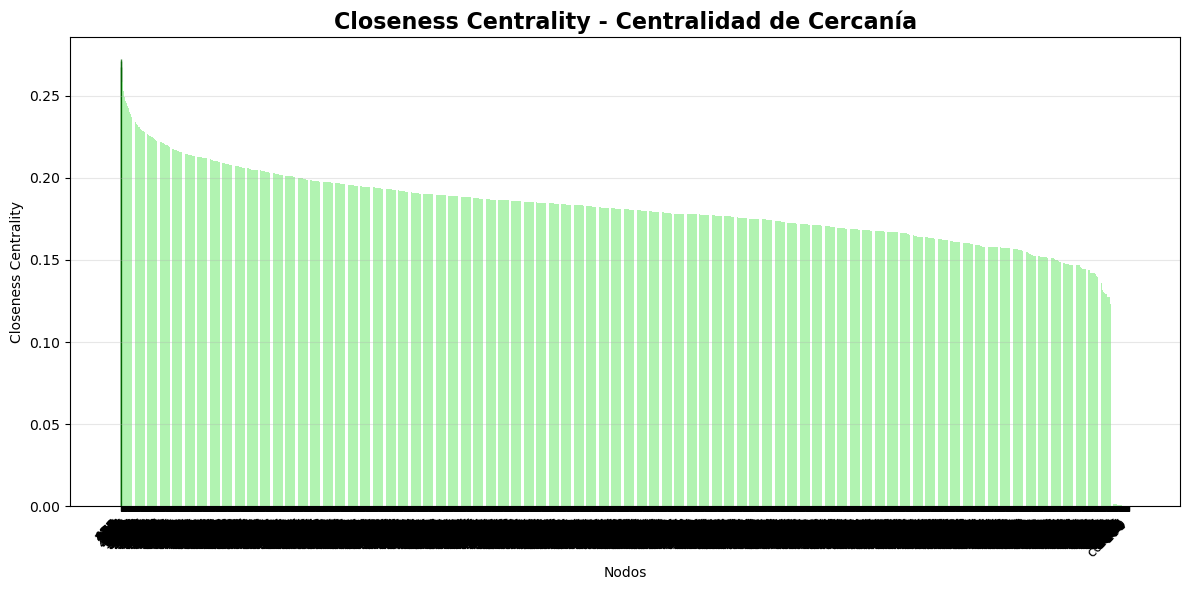

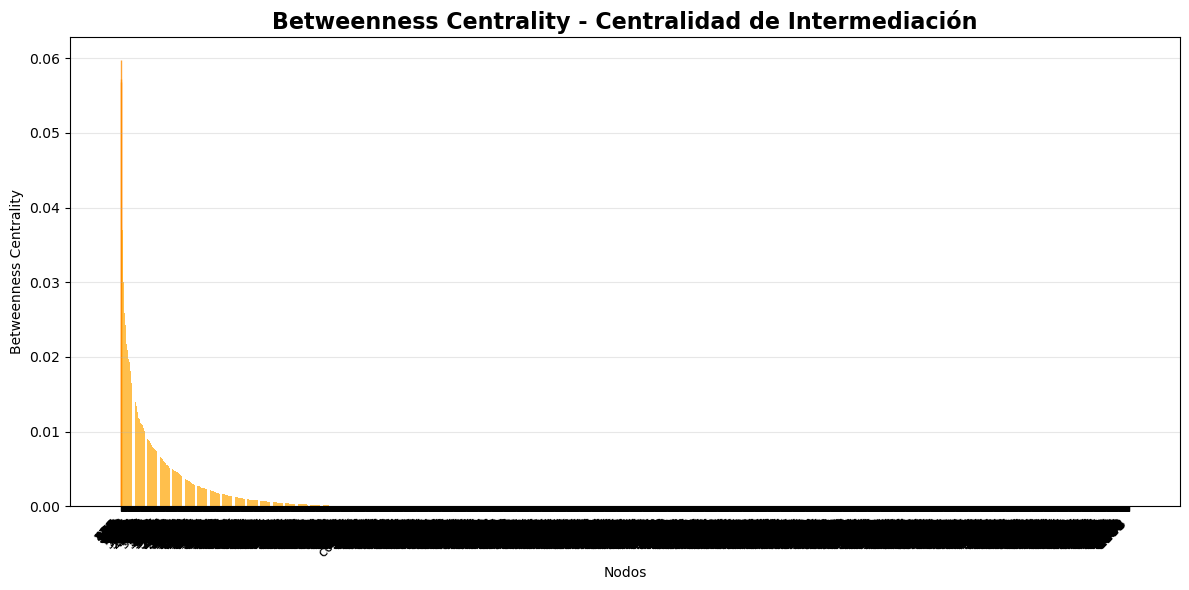

In [ ]:
#GRÁFICO PARA DEGREE CENTRALITY
def plot_degree_centrality(degree_centrality):
    """Gráfico de barras para Degree Centrality"""
    plt.figure(figsize=(12, 6))
    
    # Ordenar nodos por valor de centralidad
    sorted_items = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    nodes, values = zip(*sorted_items)
    
    bars = plt.bar(range(len(nodes)), values, color='skyblue', alpha=0.7)
    
    # Resaltar los 3 nodos con mayor centralidad
    for i in range(min(3, len(bars))):
        bars[i].set_color('red')
        bars[i].set_alpha(0.8)
    
    plt.title('Degree Centrality - Centralidad de Grado', fontsize=16, fontweight='bold')
    plt.xlabel('Nodos')
    plt.ylabel('Degree Centrality')
    plt.xticks(range(len(nodes)), nodes, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

#GRÁFICO PARA CLOSENESS CENTRALITY
def plot_closeness_centrality(closeness_centrality):
    """Gráfico de barras para Closeness Centrality"""
    plt.figure(figsize=(12, 6))
    
    # Ordenar nodos por valor de centralidad
    sorted_items = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
    nodes, values = zip(*sorted_items)
    
    bars = plt.bar(range(len(nodes)), values, color='lightgreen', alpha=0.7)
    
    # Resaltar los 3 nodos con mayor centralidad
    for i in range(min(3, len(bars))):
        bars[i].set_color('darkgreen')
        bars[i].set_alpha(0.8)
    
    plt.title('Closeness Centrality - Centralidad de Cercanía', fontsize=16, fontweight='bold')
    plt.xlabel('Nodos')
    plt.ylabel('Closeness Centrality')
    plt.xticks(range(len(nodes)), nodes, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

#GRÁFICO PARA BETWEENNESS CENTRALITY
def plot_betweenness_centrality(betweenness_centrality):
    """Gráfico de barras para Betweenness Centrality"""
    plt.figure(figsize=(12, 6))
    
    # Ordenar nodos por valor de centralidad
    sorted_items = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    nodes, values = zip(*sorted_items)
    
    bars = plt.bar(range(len(nodes)), values, color='orange', alpha=0.7)
    
    # Resaltar los 3 nodos con mayor centralidad
    for i in range(min(3, len(bars))):
        bars[i].set_color('darkorange')
        bars[i].set_alpha(0.8)
    
    plt.title('Betweenness Centrality - Centralidad de Intermediación', fontsize=16, fontweight='bold')
    plt.xlabel('Nodos')
    plt.ylabel('Betweenness Centrality')
    plt.xticks(range(len(nodes)), nodes, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# FUNCIÓN PARA MOSTRAR ESTADÍSTICAS DE CADA MÉTRICA
def print_centrality_stats(centrality_dict, metric_name):
    values = list(centrality_dict.values())
    sorted_items = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\n=== {metric_name} ===")
    print(f"Valor máximo: {max(values):.4f}")
    print(f"Valor mínimo: {min(values):.4f}")
    print(f"Promedio: {np.mean(values):.4f}")
    print(f"Desviación estándar: {np.std(values):.4f}")
    print(f"Top 3 nodos:")
    for i, (node, value) in enumerate(sorted_items[:3]):
        print(f"  {i+1}. Nodo {node}: {value:.4f}")


def plot_all_centralities(degree_centrality, closeness_centrality, betweenness_centrality):
    """Ejecuta todos los gráficos y estadísticas"""
    
    # Mostrar estadísticas
    print_centrality_stats(degree_centrality, "DEGREE CENTRALITY")
    print_centrality_stats(closeness_centrality, "CLOSENESS CENTRALITY") 
    print_centrality_stats(betweenness_centrality, "BETWEENNESS CENTRALITY")
    
    # Crear gráficos
    plot_degree_centrality(degree_centrality)
    plot_closeness_centrality(closeness_centrality)
    plot_betweenness_centrality(betweenness_centrality)



plot_all_centralities(degree_centrality, closeness_centrality, betweenness_centrality)


# plot_degree_centrality(degree_centrality)
# plot_closeness_centrality(closeness_centrality)  
# plot_betweenness_centrality(betweenness_centrality)


In [31]:
#red erdos

#degree centrality
degree_centrality_erdos = nx.degree_centrality(G_erdos)
print("Degree Centrality:", degree_centrality)
#closeness centrality
closeness_centrality_erdos = nx.closeness_centrality(G_erdos)
print("Closeness Centrality:", closeness_centrality)
#betweenness centrality
betweenness_centrality_erdos = nx.betweenness_centrality(G_erdos)
print("Betweenness Centrality:", betweenness_centrality)

Degree Centrality: {'contrib': 0.00020149103364900262, 'to': 0.00020149103364900262, '181': 0.003223856538384042, '1': 0.004432802740278058, '295': 0.004432802740278058, '305': 0.0036268386056820473, '379': 0.007253677211364095, '406': 0.0036268386056820473, '427': 0.006850695144066089, '664': 0.00020149103364900262, '1073': 0.00020149103364900262, '1548': 0.00040298206729800525, '1751': 0.0006044731009470078, '1988': 0.00020149103364900262, '2320': 0.00040298206729800525, '2786': 0.0010074551682450132, '3306': 0.0008059641345960105, '3965': 0.00040298206729800525, '4329': 0.0006044731009470078, '4864': 0.00020149103364900262, '5048': 0.0006044731009470078, '5195': 0.0010074551682450132, '5447': 0.00040298206729800525, '5581': 0.00020149103364900262, '5783': 0.0008059641345960105, '4065': 0.00020149103364900262, '2': 0.0036268386056820473, '4075': 0.00020149103364900262, '4209': 0.00020149103364900262, '4357': 0.0010074551682450132, '4409': 0.00020149103364900262, '4428': 0.00040298206


=== DEGREE CENTRALITY ===
Valor máximo: 0.0123
Valor mínimo: 0.0002
Promedio: 0.0006
Desviación estándar: 0.0013
Top 3 nodos:
  1. Nodo 426: 0.0123
  2. Nodo 438: 0.0121
  3. Nodo 244: 0.0117

=== CLOSENESS CENTRALITY ===
Valor máximo: 0.2722
Valor mínimo: 0.0002
Promedio: 0.1788
Desviación estándar: 0.0318
Top 3 nodos:
  1. Nodo 417: 0.2722
  2. Nodo 415: 0.2709
  3. Nodo 438: 0.2673

=== BETWEENNESS CENTRALITY ===
Valor máximo: 0.0598
Valor mínimo: 0.0000
Promedio: 0.0009
Desviación estándar: 0.0036
Top 3 nodos:
  1. Nodo 175: 0.0598
  2. Nodo 417: 0.0573
  3. Nodo 415: 0.0569


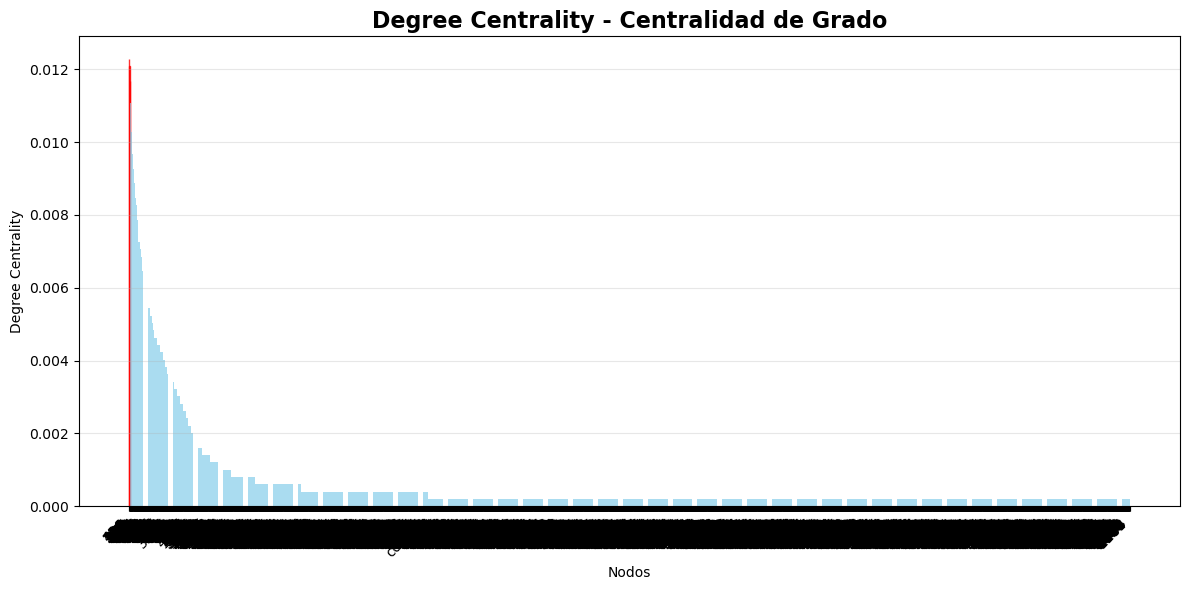

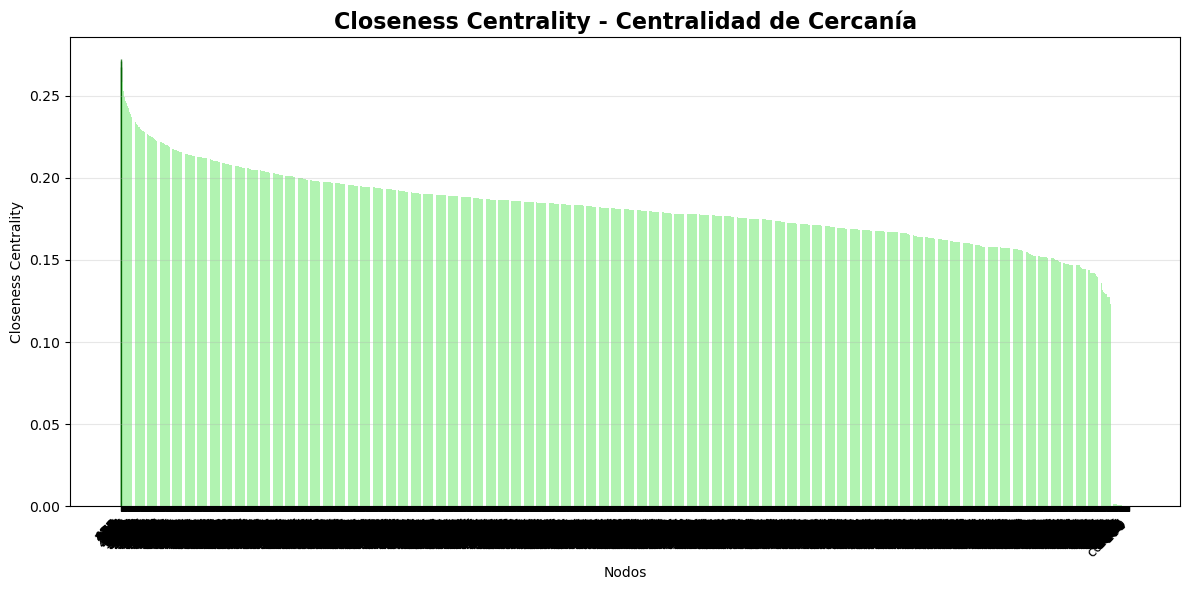

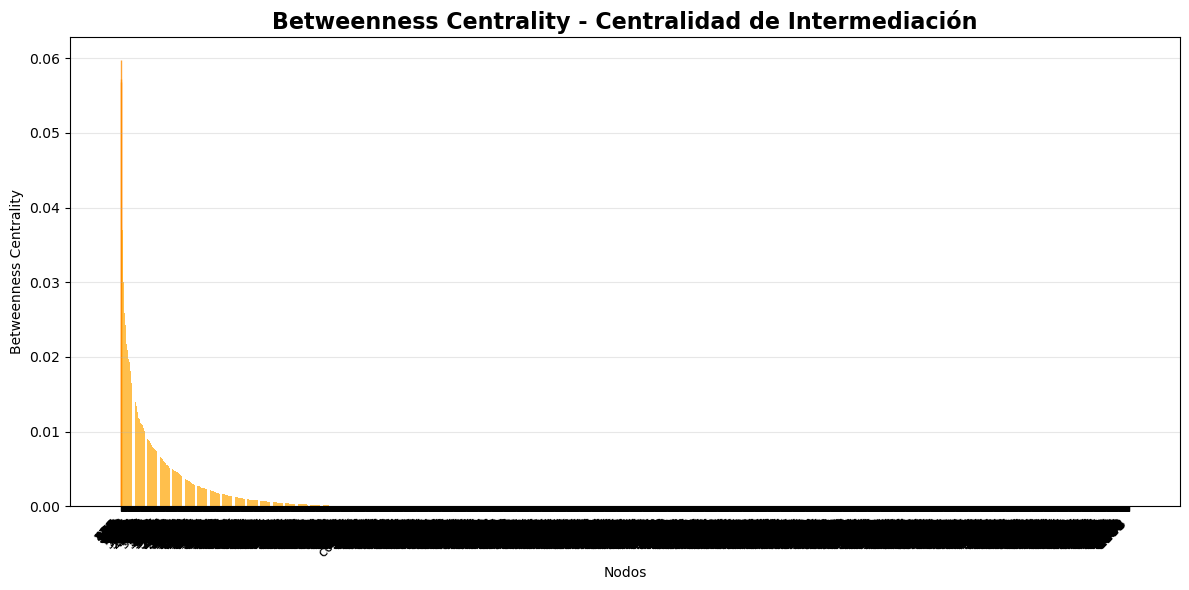

In [32]:
#GRÁFICO PARA DEGREE CENTRALITY
def plot_degree_centrality(degree_centrality):
    """Gráfico de barras para Degree Centrality"""
    plt.figure(figsize=(12, 6))
    
    # Ordenar nodos por valor de centralidad
    sorted_items = sorted(degree_centrality_erdos.items(), key=lambda x: x[1], reverse=True)
    nodes, values = zip(*sorted_items)
    
    bars = plt.bar(range(len(nodes)), values, color='skyblue', alpha=0.7)
    
    # Resaltar los 3 nodos con mayor centralidad
    for i in range(min(3, len(bars))):
        bars[i].set_color('red')
        bars[i].set_alpha(0.8)
    
    plt.title('Degree Centrality - Centralidad de Grado', fontsize=16, fontweight='bold')
    plt.xlabel('Nodos')
    plt.ylabel('Degree Centrality')
    plt.xticks(range(len(nodes)), nodes, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

#GRÁFICO PARA CLOSENESS CENTRALITY
def plot_closeness_centrality(closeness_centrality):
    """Gráfico de barras para Closeness Centrality"""
    plt.figure(figsize=(12, 6))
    
    # Ordenar nodos por valor de centralidad
    sorted_items = sorted(closeness_centrality_erdos.items(), key=lambda x: x[1], reverse=True)
    nodes, values = zip(*sorted_items)
    
    bars = plt.bar(range(len(nodes)), values, color='lightgreen', alpha=0.7)
    
    # Resaltar los 3 nodos con mayor centralidad
    for i in range(min(3, len(bars))):
        bars[i].set_color('darkgreen')
        bars[i].set_alpha(0.8)
    
    plt.title('Closeness Centrality - Centralidad de Cercanía', fontsize=16, fontweight='bold')
    plt.xlabel('Nodos')
    plt.ylabel('Closeness Centrality')
    plt.xticks(range(len(nodes)), nodes, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

#GRÁFICO PARA BETWEENNESS CENTRALITY
def plot_betweenness_centrality(betweenness_centrality):
    """Gráfico de barras para Betweenness Centrality"""
    plt.figure(figsize=(12, 6))
    
    # Ordenar nodos por valor de centralidad
    sorted_items = sorted(betweenness_centrality_erdos.items(), key=lambda x: x[1], reverse=True)
    nodes, values = zip(*sorted_items)
    
    bars = plt.bar(range(len(nodes)), values, color='orange', alpha=0.7)
    
    # Resaltar los 3 nodos con mayor centralidad
    for i in range(min(3, len(bars))):
        bars[i].set_color('darkorange')
        bars[i].set_alpha(0.8)
    
    plt.title('Betweenness Centrality - Centralidad de Intermediación', fontsize=16, fontweight='bold')
    plt.xlabel('Nodos')
    plt.ylabel('Betweenness Centrality')
    plt.xticks(range(len(nodes)), nodes, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# FUNCIÓN PARA MOSTRAR ESTADÍSTICAS DE CADA MÉTRICA
def print_centrality_stats(centrality_dict, metric_name):
    values = list(centrality_dict.values())
    sorted_items = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\n=== {metric_name} ===")
    print(f"Valor máximo: {max(values):.4f}")
    print(f"Valor mínimo: {min(values):.4f}")
    print(f"Promedio: {np.mean(values):.4f}")
    print(f"Desviación estándar: {np.std(values):.4f}")
    print(f"Top 3 nodos:")
    for i, (node, value) in enumerate(sorted_items[:3]):
        print(f"  {i+1}. Nodo {node}: {value:.4f}")


def plot_all_centralities(degree_centrality, closeness_centrality, betweenness_centrality):
    """Ejecuta todos los gráficos y estadísticas"""
    
    # Mostrar estadísticas
    print_centrality_stats(degree_centrality_erdos, "DEGREE CENTRALITY")
    print_centrality_stats(closeness_centrality_erdos, "CLOSENESS CENTRALITY") 
    print_centrality_stats(betweenness_centrality_erdos, "BETWEENNESS CENTRALITY")
    
    # Crear gráficos
    plot_degree_centrality(degree_centrality_erdos)
    plot_closeness_centrality(closeness_centrality_erdos)
    plot_betweenness_centrality(betweenness_centrality_erdos)



plot_all_centralities(degree_centrality_erdos, closeness_centrality_erdos, betweenness_centrality_erdos)


# plot_degree_centrality(degree_centrality)
# plot_closeness_centrality(closeness_centrality)  
# plot_betweenness_centrality(betweenness_centrality)


## 1.3 Eliminación de nodos (5 puntos)

Tomando en consideración el criterio de centralidad de los nodos, elimine los 10 más relevantes para cada caso. Justifique su decisión.

Luego, grafique las nuevas redes obtenidas y calcule las métricas de la actividad 1.1. Comente.

¿Qué red muestra mayor robustez? Justifique su respuesta.

**Respuesta:**

Nuevas metricas

C:\Users\itzae\AppData\Local\Temp\ipykernel_20360\3556312746.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Degree Centrality')


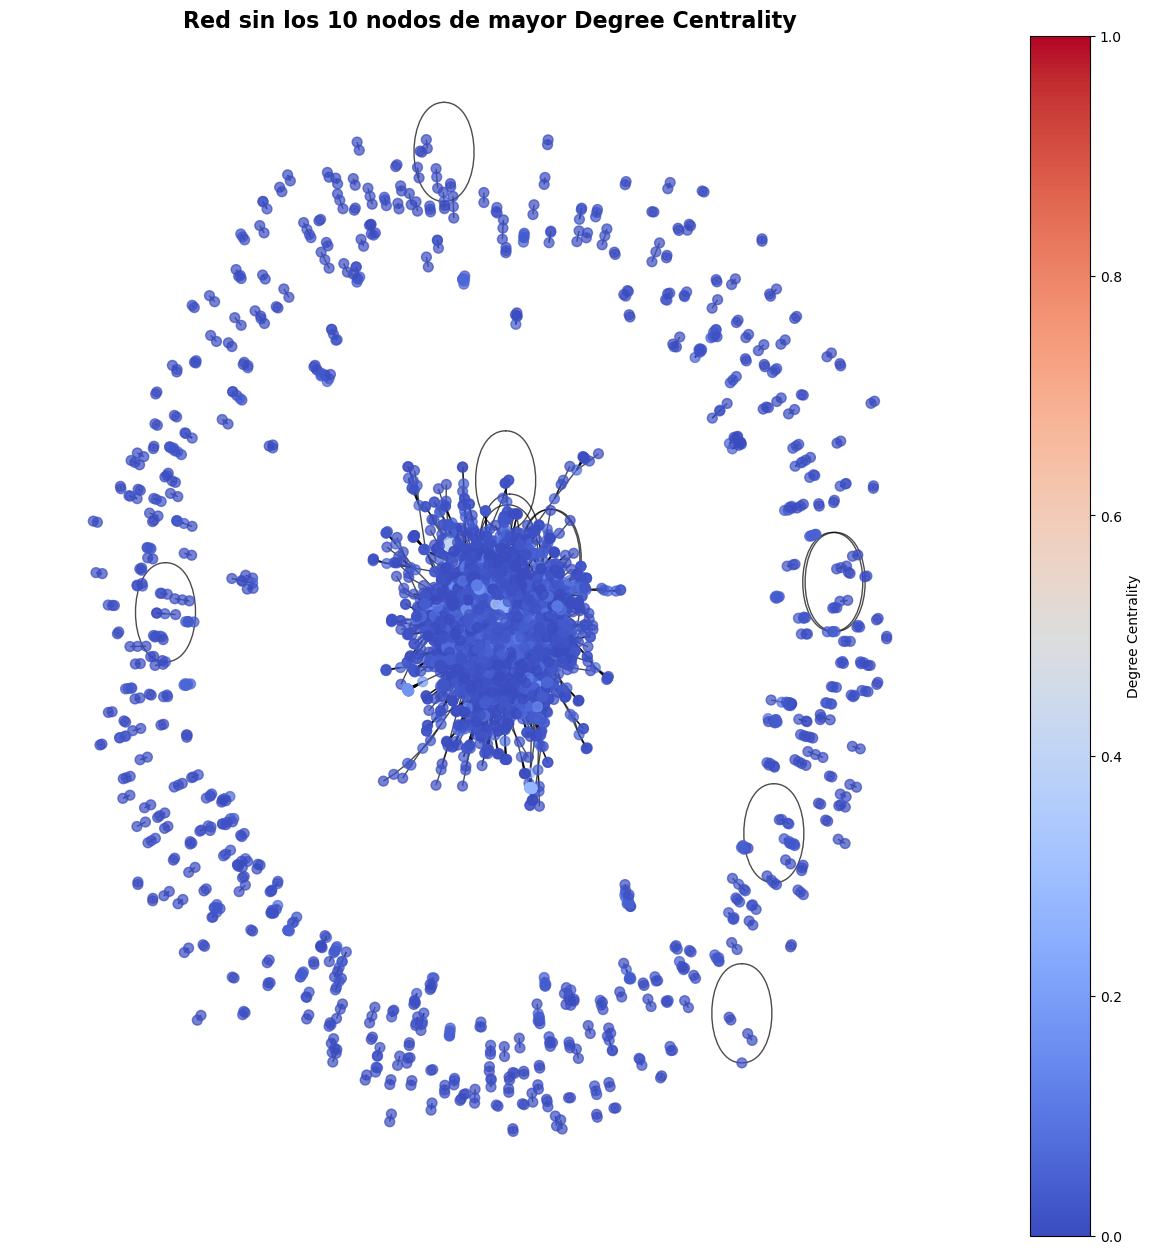

In [41]:
G_not_degree = G.copy()
G_not_degree.remove_nodes_from(sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10])

# Graficar con colores basados en degree centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_not_degree)
new_degree_centrality = nx.degree_centrality(G_not_degree)
node_colors = [new_degree_centrality[node] for node in G_not_degree.nodes()]
nx.draw(G_not_degree, pos, with_labels=False, node_size=50, 
        node_color=node_colors, cmap=plt.cm.coolwarm, alpha=0.7)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Degree Centrality')
plt.title('Red sin los 10 nodos de mayor Degree Centrality', fontsize=16, fontweight='bold')
plt.show()



C:\Users\itzae\AppData\Local\Temp\ipykernel_20360\3966825616.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Betweenness Centrality')


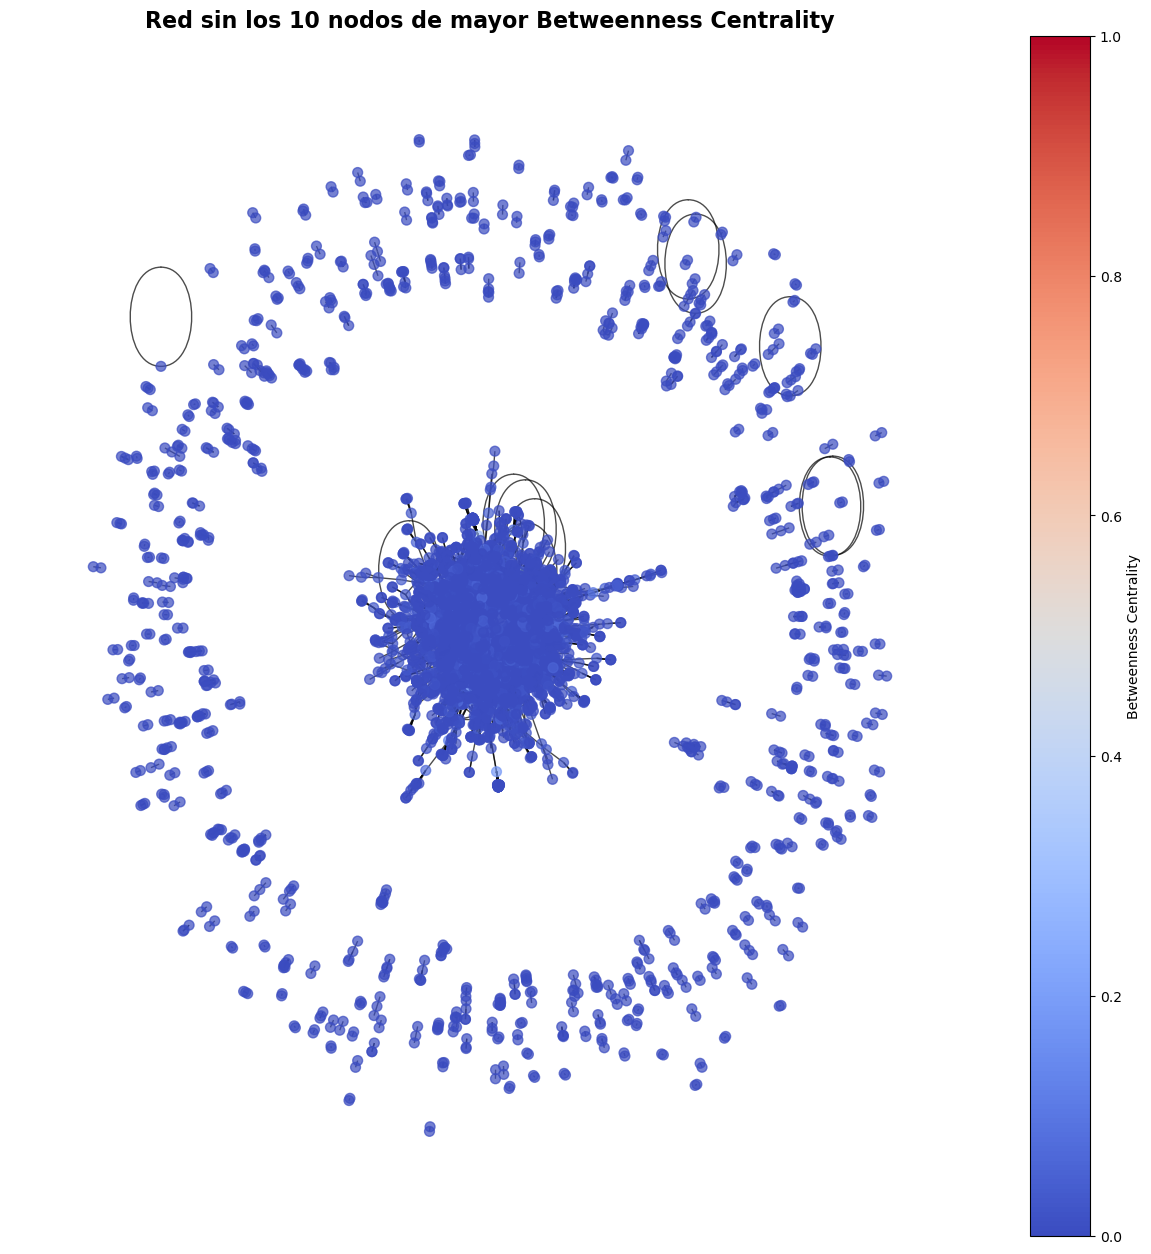

In [42]:
G_not_betweenness = G.copy()
G_not_betweenness.remove_nodes_from(sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10])
# Graficar con colores basados en betweenness centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_not_betweenness)
new_betweenness_centrality = nx.betweenness_centrality(G_not_betweenness)
node_colors = [new_betweenness_centrality[node] for node in G_not_betweenness.nodes()]
nx.draw(G_not_betweenness, pos, with_labels=False, node_size=50, 
        node_color=node_colors, cmap=plt.cm.coolwarm, alpha=0.7)       
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Betweenness Centrality')
plt.title('Red sin los 10 nodos de mayor Betweenness Centrality', fontsize=16, fontweight='bold')
plt.show()

C:\Users\itzae\AppData\Local\Temp\ipykernel_20360\3543976096.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Closeness Centrality')


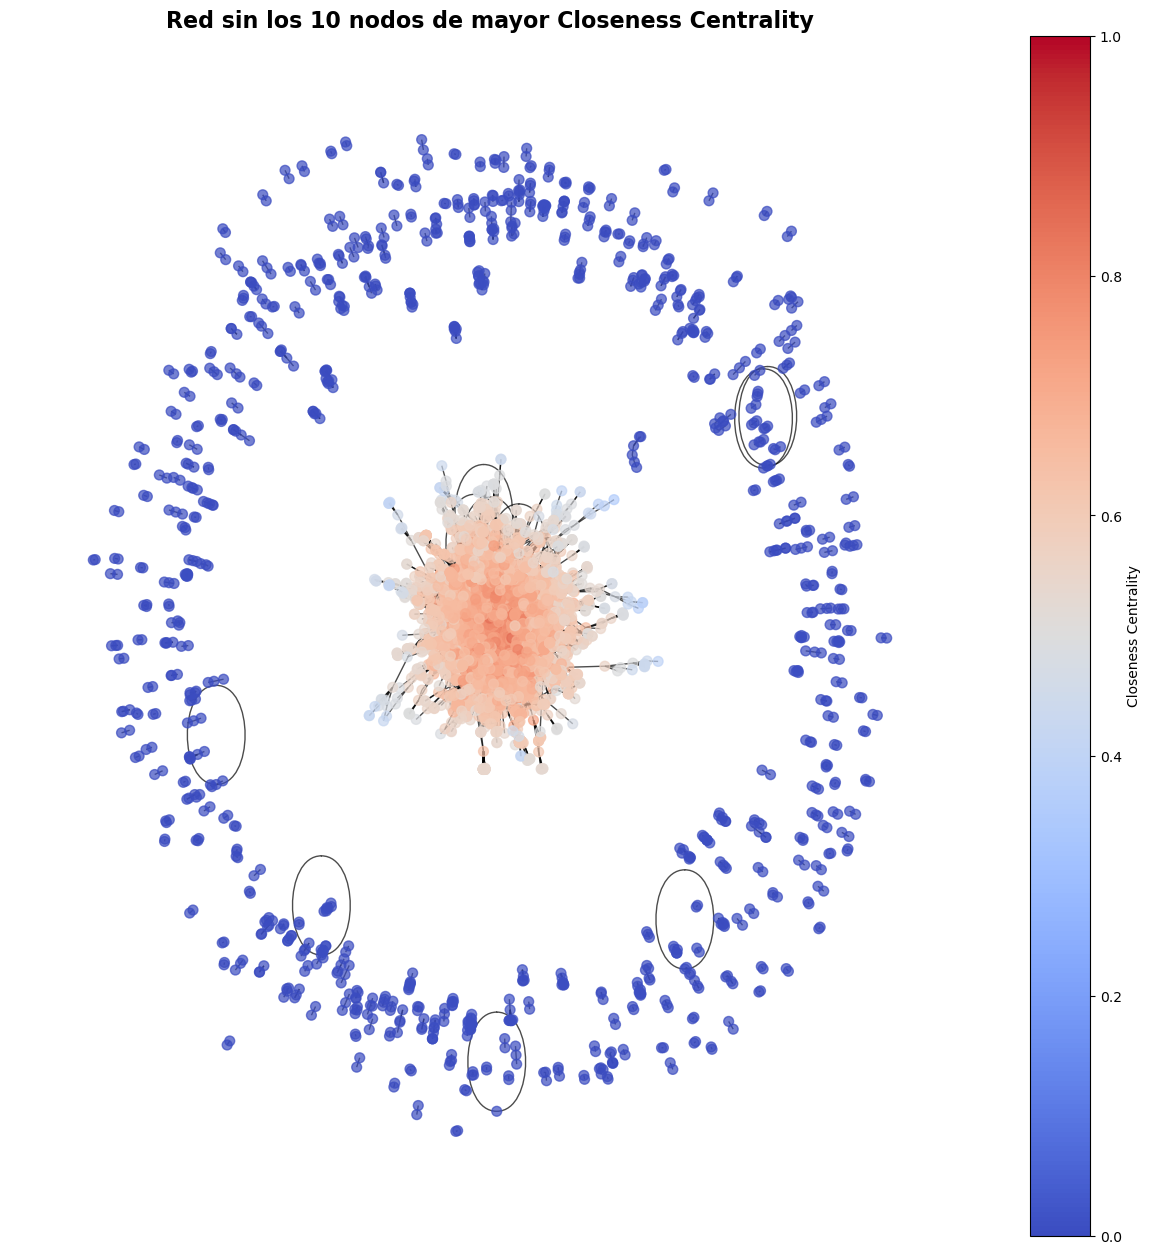

In [43]:
G_not_closeness = G.copy()
G_not_closeness.remove_nodes_from(sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:10])
# Graficar con colores basados en closeness centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_not_closeness)
new_closeness_centrality = nx.closeness_centrality(G_not_closeness)
node_colors = [new_closeness_centrality[node] for node in G_not_closeness.nodes()]
nx.draw(G_not_closeness, pos, with_labels=False, node_size=50, 
        node_color=node_colors, cmap=plt.cm.coolwarm, alpha=0.7)       
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Closeness Centrality')
plt.title('Red sin los 10 nodos de mayor Closeness Centrality', fontsize=16, fontweight='bold')
plt.show()

In [47]:
# Calcular nuevas métricas promedio
new_degree_centrality = nx.degree_centrality(G_not_degree)
new_closeness_centrality = nx.closeness_centrality(G_not_closeness)
new_betweenness_centrality = nx.betweenness_centrality(G_not_betweenness)
print("Nuevas métricas después de remover nodos con mayor Degree Centrality:")
print("Degree Centrality:", new_degree_centrality)
print("Closeness Centrality:", new_closeness_centrality)
print("Betweenness Centrality:", new_betweenness_centrality)


Nuevas métricas después de remover nodos con mayor Degree Centrality:
Degree Centrality: {'FromNodeId': 0.0001908761213972132, 'ToNodeId': 0.0001908761213972132, '3466': 0.0015270089711777056, '937': 0.000954380606986066, '5233': 0.0003817522427944264, '8579': 0.000954380606986066, '10310': 0.0024813895781637717, '15931': 0.001908761213972132, '17038': 0.003244894063752624, '18720': 0.0005726283641916396, '19607': 0.0007635044855888528, '1854': 0.0015270089711777056, '4583': 0.0005726283641916396, '9572': 0.006489788127505248, '10841': 0.0013361328497804924, '13056': 0.001908761213972132, '14982': 0.0003817522427944264, '16310': 0.003244894063752624, '19640': 0.0045810269135331165, '23855': 0.0015270089711777056, '24372': 0.0001908761213972132, '24814': 0.0040083985493414775, '5052': 0.0055354075205191824, '899': 0.0005726283641916396, '1796': 0.0003817522427944264, '2287': 0.0026722656995609847, '3096': 0.0022905134567665583, '3386': 0.0020996373353693453, '4472': 0.000763504485588852

In [48]:
# FUNCIÓN PARA MOSTRAR ESTADÍSTICAS DE CADA MÉTRICA
def print_centrality_stats(centrality_dict, metric_name):
    values = list(centrality_dict.values())
    sorted_items = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\n=== {metric_name} ===")
    print(f"Valor máximo: {max(values):.4f}")
    print(f"Valor mínimo: {min(values):.4f}")
    print(f"Promedio: {np.mean(values):.4f}")
    print(f"Desviación estándar: {np.std(values):.4f}")
    print(f"Top 3 nodos:")
    for i, (node, value) in enumerate(sorted_items[:3]):
        print(f"  {i+1}. Nodo {node}: {value:.4f}")

def plot_all_centralities(degree_centrality, closeness_centrality, betweenness_centrality):
    """Ejecuta todos los gráficos y estadísticas"""
    
  
    print_centrality_stats(new_degree_centrality, "DEGREE CENTRALITY")
    print_centrality_stats(new_closeness_centrality, "CLOSENESS CENTRALITY") 
    print_centrality_stats(new_betweenness_centrality, "BETWEENNESS CENTRALITY")

#llamar
plot_all_centralities(new_degree_centrality, new_closeness_centrality, new_betweenness_centrality)



=== DEGREE CENTRALITY ===
Valor máximo: 0.0155
Valor mínimo: 0.0002
Promedio: 0.0011
Desviación estándar: 0.0015
Top 3 nodos:
  1. Nodo 21012: 0.0155
  2. Nodo 21281: 0.0151
  3. Nodo 22691: 0.0147

=== CLOSENESS CENTRALITY ===
Valor máximo: 0.1941
Valor mínimo: 0.0000
Promedio: 0.1061
Desviación estándar: 0.0565
Top 3 nodos:
  1. Nodo 13801: 0.1941
  2. Nodo 14485: 0.1893
  3. Nodo 9572: 0.1889

=== BETWEENNESS CENTRALITY ===
Valor máximo: 0.0371
Valor mínimo: 0.0000
Promedio: 0.0006
Desviación estándar: 0.0020
Top 3 nodos:
  1. Nodo 13801: 0.0371
  2. Nodo 9572: 0.0259
  3. Nodo 14599: 0.0255


Erdos

C:\Users\itzae\AppData\Local\Temp\ipykernel_20360\1574086425.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Degree Centrality')


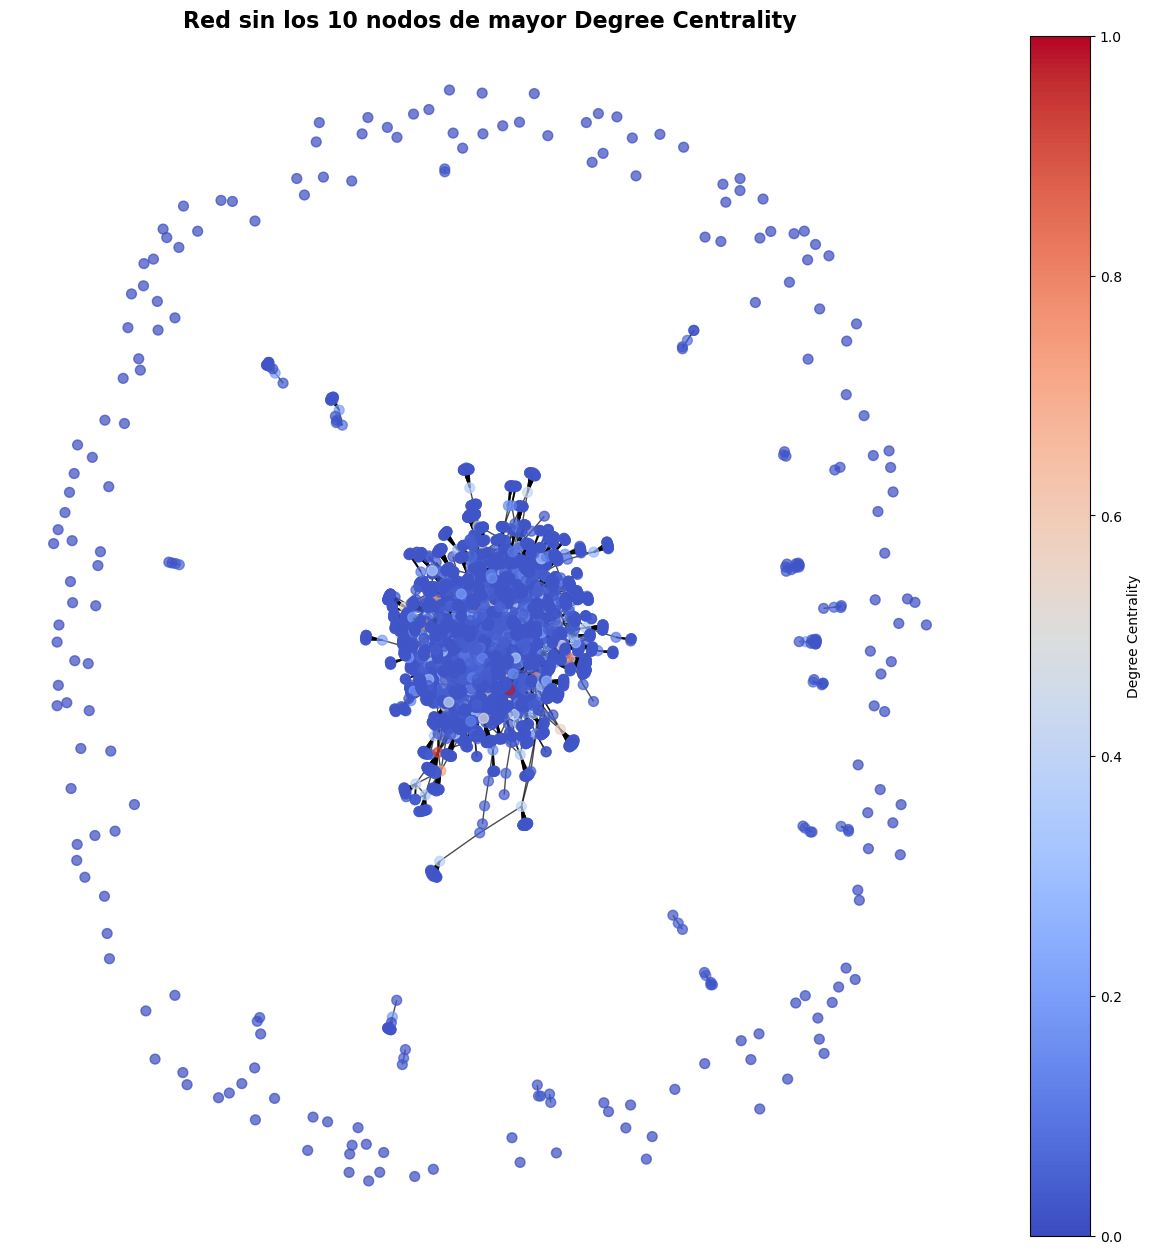

C:\Users\itzae\AppData\Local\Temp\ipykernel_20360\1574086425.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Betweenness Centrality')


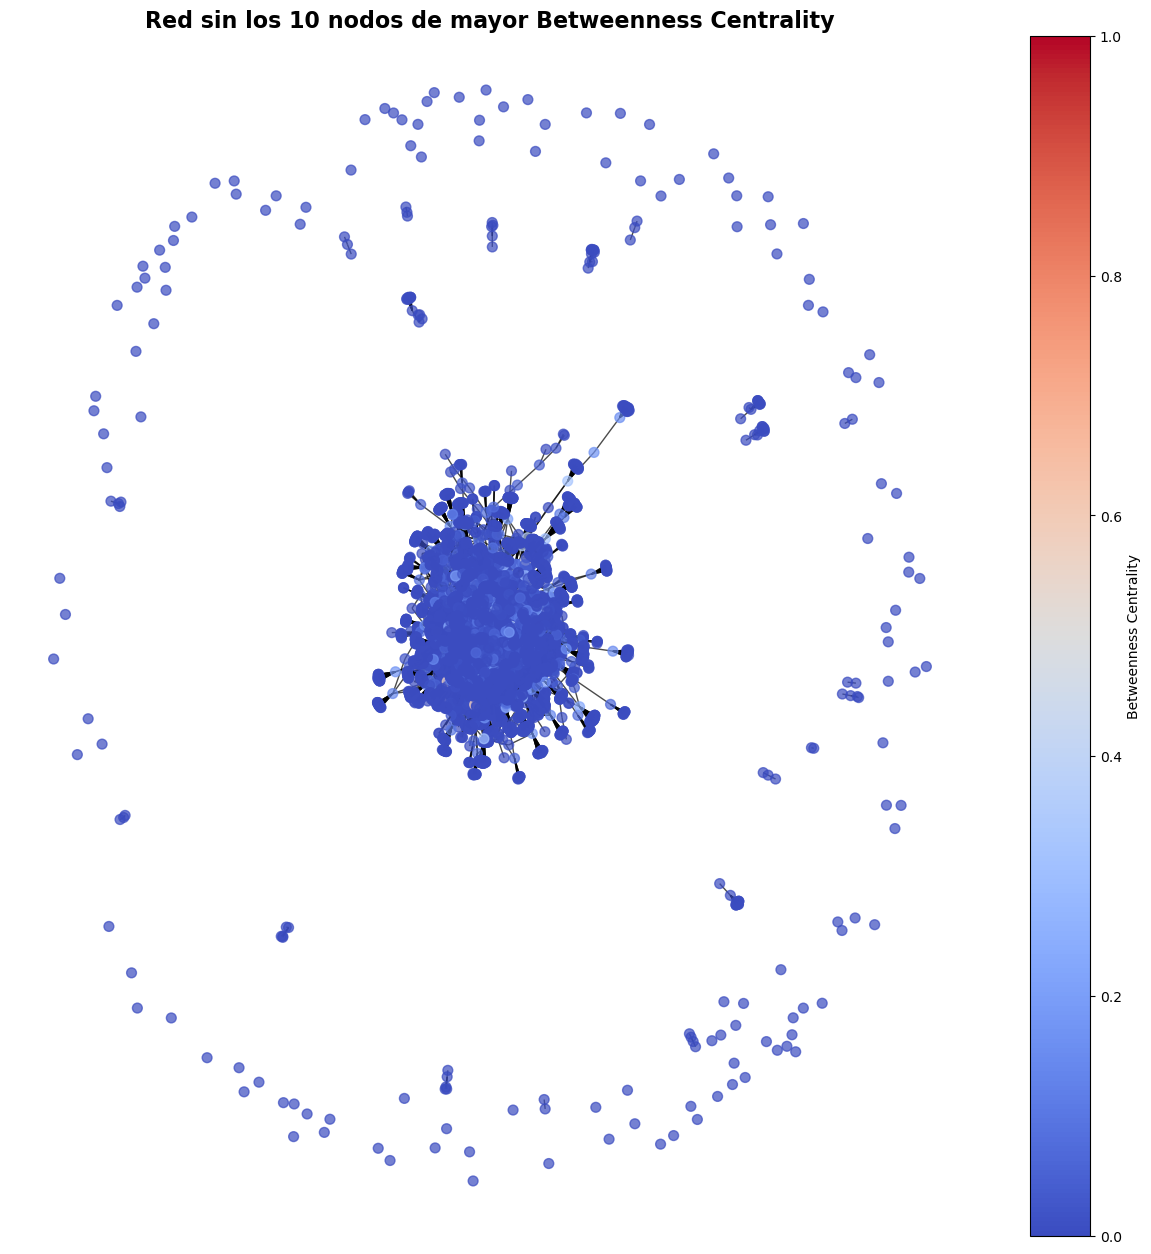

C:\Users\itzae\AppData\Local\Temp\ipykernel_20360\1574086425.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Closeness Centrality')


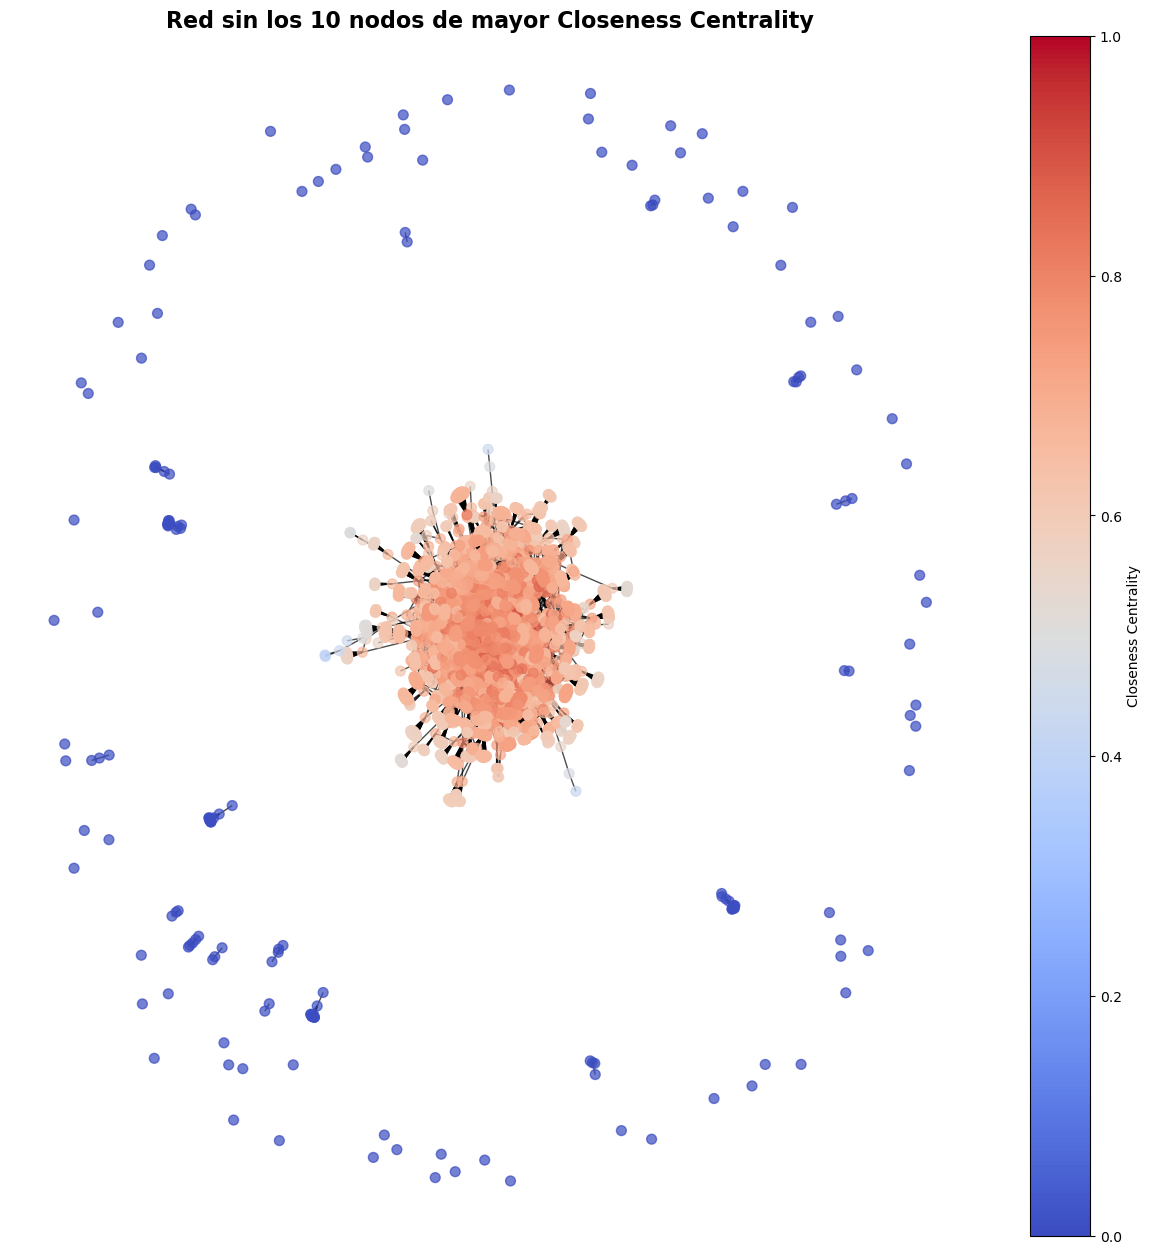

In [49]:
#hacer lo mismo con el red erdos

G_not_degree_erdos = G_erdos.copy()
G_not_degree_erdos.remove_nodes_from(sorted(degree_centrality_erdos, key=degree_centrality_erdos.get, reverse=True)[:10])

# Graficar con colores basados en degree centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_not_degree_erdos)
new_degree_centrality = nx.degree_centrality(G_not_degree_erdos)
node_colors = [new_degree_centrality[node] for node in G_not_degree_erdos.nodes()]
nx.draw(G_not_degree_erdos, pos, with_labels=False, node_size=50, 
        node_color=node_colors, cmap=plt.cm.coolwarm, alpha=0.7)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Degree Centrality')
plt.title('Red sin los 10 nodos de mayor Degree Centrality', fontsize=16, fontweight='bold')
plt.show()

G_not_betweenness_erdos = G_erdos.copy()
G_not_betweenness_erdos.remove_nodes_from(sorted(betweenness_centrality_erdos, key=betweenness_centrality_erdos.get, reverse=True)[:10])
# Graficar con colores basados en betweenness centrality   
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_not_betweenness_erdos)
new_betweenness_centrality = nx.betweenness_centrality(G_not_betweenness_erdos)
node_colors = [new_betweenness_centrality[node] for node in G_not_betweenness_erdos.nodes()]
nx.draw(G_not_betweenness_erdos, pos, with_labels=False, node_size=50, 
        node_color=node_colors, cmap=plt.cm.coolwarm, alpha=0.7)    
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Betweenness Centrality')
plt.title('Red sin los 10 nodos de mayor Betweenness Centrality', fontsize=16, fontweight='bold')
plt.show()

G_not_closeness_erdos = G_erdos.copy()
G_not_closeness_erdos.remove_nodes_from(sorted(closeness_centrality_erdos, key=closeness_centrality_erdos.get, reverse=True)[:10])
# Graficar con colores basados en closeness centrality  
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_not_closeness_erdos)
new_closeness_centrality = nx.closeness_centrality(G_not_closeness_erdos)
node_colors = [new_closeness_centrality[node] for node in G_not_closeness_erdos.nodes()]
nx.draw(G_not_closeness_erdos, pos, with_labels=False, node_size=50, 
        node_color=node_colors, cmap=plt.cm.coolwarm, alpha=0.7)    
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label='Closeness Centrality')
plt.title('Red sin los 10 nodos de mayor Closeness Centrality', fontsize=16, fontweight='bold')
plt.show()


In [50]:
new_degree_centrality_erdos = nx.degree_centrality(G_not_degree_erdos)
new_closeness_centrality_erdos = nx.closeness_centrality(G_not_closeness_erdos)
new_betweenness_centrality_erdos = nx.betweenness_centrality(G_not_betweenness_erdos)
print("Nuevas métricas después de remover nodos con mayor Degree Centrality:")
print("Degree Centrality:", new_degree_centrality_erdos)
print("Closeness Centrality:", new_closeness_centrality_erdos)
print("Betweenness Centrality:", new_betweenness_centrality_erdos)

Nuevas métricas después de remover nodos con mayor Degree Centrality:
Degree Centrality: {'contrib': 0.0002018978396931153, 'to': 0.0002018978396931153, '181': 0.0032303654350898446, '1': 0.004441752473248536, '295': 0.004441752473248536, '305': 0.0036341611144760752, '379': 0.007066424389259035, '406': 0.00343226327478296, '427': 0.006662628709872804, '664': 0.0002018978396931153, '1073': 0.0002018978396931153, '1548': 0.0004037956793862306, '1751': 0.0006056935190793458, '1988': 0.0002018978396931153, '2320': 0.0004037956793862306, '2786': 0.0008075913587724611, '3306': 0.0008075913587724611, '3965': 0.0004037956793862306, '4329': 0.0006056935190793458, '4864': 0.0002018978396931153, '5048': 0.0004037956793862306, '5195': 0.0010094891984655764, '5447': 0.0004037956793862306, '5581': 0.0002018978396931153, '5783': 0.0008075913587724611, '4065': 0.0002018978396931153, '2': 0.0036341611144760752, '4075': 0.0002018978396931153, '4209': 0.0002018978396931153, '4357': 0.0004037956793862306

In [53]:
# FUNCIÓN PARA MOSTRAR ESTADÍSTICAS DE CADA MÉTRICA
def print_centrality_stats(centrality_dict, metric_name):
    values = list(centrality_dict.values())
    sorted_items = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\n=== {metric_name} ===")
    print(f"Valor máximo: {max(values):.4f}")
    print(f"Valor mínimo: {min(values):.4f}")
    print(f"Promedio: {np.mean(values):.4f}")
    print(f"Desviación estándar: {np.std(values):.4f}")
    print(f"Top 3 nodos:")
    for i, (node, value) in enumerate(sorted_items[:3]):
        print(f"  {i+1}. Nodo {node}: {value:.4f}")

def plot_all_centralities(degree_centrality, closeness_centrality, betweenness_centrality):
    """Ejecuta todos los gráficos y estadísticas"""
    
  
    print_centrality_stats(new_degree_centrality_erdos, "DEGREE CENTRALITY")
    print_centrality_stats(new_closeness_centrality_erdos, "CLOSENESS CENTRALITY")
    print_centrality_stats(new_betweenness_centrality_erdos, "BETWEENNESS CENTRALITY")

#llamar
plot_all_centralities(new_degree_centrality_erdos, new_closeness_centrality_erdos, new_betweenness_centrality_erdos)



=== DEGREE CENTRALITY ===
Valor máximo: 0.0101
Valor mínimo: 0.0000
Promedio: 0.0006
Desviación estándar: 0.0012
Top 3 nodos:
  1. Nodo 221: 0.0101
  2. Nodo 264: 0.0099
  3. Nodo 78: 0.0097

=== CLOSENESS CENTRALITY ===
Valor máximo: 0.2405
Valor mínimo: 0.0000
Promedio: 0.1654
Desviación estándar: 0.0360
Top 3 nodos:
  1. Nodo 320: 0.2405
  2. Nodo 171: 0.2378
  3. Nodo 244: 0.2364

=== BETWEENNESS CENTRALITY ===
Valor máximo: 0.0431
Valor mínimo: 0.0000
Promedio: 0.0009
Desviación estándar: 0.0032
Top 3 nodos:
  1. Nodo 383: 0.0431
  2. Nodo 171: 0.0387
  3. Nodo 244: 0.0381


# Parte 2: Análisis de red social (20 puntos)

En esta segunda sección se debe trabajar con un grafo que refleja las interacciones de una red social.

El dataset es **lastfm_asia_edges.csv** y posee dos columnas: nodo origen y nodo destino.

## 2.1 Modelos de grafo (4 puntos)


Describa las principales características de los modelos:

* Erdös-Rényi
* Watts-Strogatz
* Barabási-Albert

¿En qué se diferencian?

**Respuesta:**

## 2.2 Caracterización de la red (4 puntos)

Grafique la distribución de grado de la red y determine el grado promedio. Interprete sus resultados.

**Respuesta:**

In [60]:
#importar csv

df_asia = pd.read_csv("lastfm_asia_edges.csv")

df_asia.head()

#crear grafo

G_asia = nx.from_pandas_edgelist(df_asia, 'node_1', 'node_2')

print(G_asia)



Graph with 7624 nodes and 27806 edges


C:\Users\itzae\AppData\Local\Temp\ipykernel_20360\64840851.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")


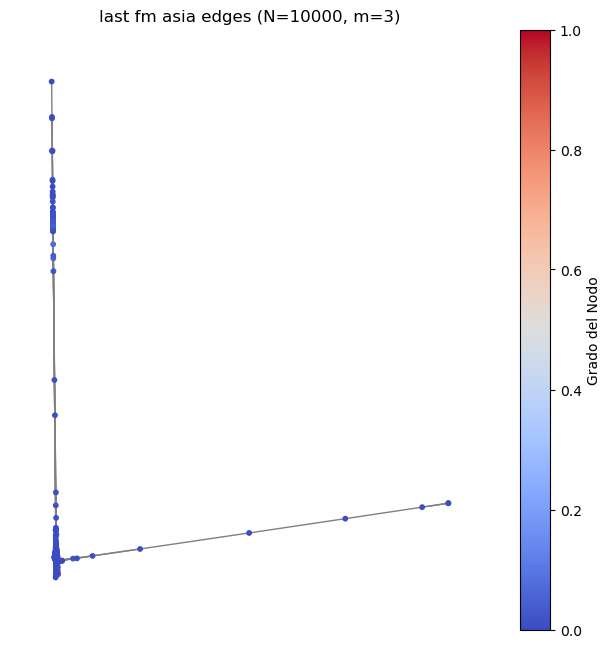

In [64]:
#distribucion del grado de la red

node_degrees = dict(G_asia.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)

colors = plt.cm.coolwarm(normalized_degrees)

pos = nx.spectral_layout(G_asia, weight=None, scale=3.0)  # Posiciones de los nodos


plt.figure(figsize=(6, 6))
nx.draw(G_asia, pos, node_color=colors, with_labels=False, node_size=10, cmap=plt.cm.coolwarm, edge_color='gray')
plt.title("last fm asia edges (N=10000, m=3)")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()

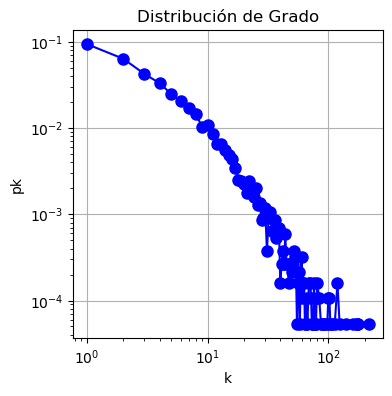

In [71]:
#distribucion del graado de la red

degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

sorted_degrees = sorted(degree_counts.items())

x, y = zip(*sorted_degrees)
p = [n / 18772 for n in y]


plt.figure(figsize=(4, 4))
plt.plot(x, p, 'bo-', markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Grado')
plt.xlabel('k')
plt.ylabel('pk')

plt.grid(True)
plt.show()

## 2.3 Detección de HUB (4 puntos)

Determine la existencia de HUB en la red, indicando los nodos. Justifique el criterio utilizado.

Luego, realice un gráfico apropiado que permita visualizarlos en la red (modificar tamaño o color).

**Respuesta:**

In [67]:
#determinar existencia del hub en la red, indicando los nodos

degrees = np.array(list(node_degrees.values()))
threshold = np.percentile(degrees, 90)  # top 10% nodos más conectados

hubs = [node for node, deg in node_degrees.items() if deg >= threshold]
print("Nodos hubs:", hubs)

pos = nx.spring_layout(G_asia, seed=42)




Nodos hubs: [4257, 2194, 6478, 2204, 6, 5303, 3, 5060, 7089, 4319, 6095, 4433, 3381, 6046, 5823, 5454, 667, 6180, 1834, 1462, 167, 2854, 2142, 1795, 4919, 5274, 3807, 13, 1794, 1223, 1509, 524, 1937, 1817, 6298, 3557, 5857, 866, 4904, 5355, 110, 2835, 6712, 1850, 4860, 4606, 5862, 3530, 7580, 16, 7296, 2626, 131, 6323, 1799, 3103, 5578, 7435, 1677, 3410, 6446, 5725, 1349, 6544, 1956, 550, 6567, 1005, 6126, 1905, 2751, 766, 6101, 6105, 7237, 1334, 951, 3165, 18, 4042, 5534, 6436, 421, 1384, 3755, 1316, 4151, 6463, 5764, 5127, 4248, 3544, 6339, 1558, 4329, 3565, 7224, 1658, 4900, 907, 2838, 543, 7579, 6652, 2711, 7075, 2644, 3499, 5564, 5854, 3418, 3136, 1312, 5676, 1166, 6709, 33, 2566, 2745, 6859, 1875, 1300, 3221, 2170, 7074, 5095, 2420, 1973, 1150, 213, 4246, 6887, 3991, 7565, 2637, 4908, 1381, 1678, 1958, 4335, 3701, 6870, 7226, 6234, 3597, 3986, 4527, 2414, 47, 1792, 7489, 5378, 6427, 3845, 6408, 2985, 538, 3181, 5314, 4657, 4146, 3833, 6458, 6991, 6876, 6207, 7213, 3360, 4000, 551

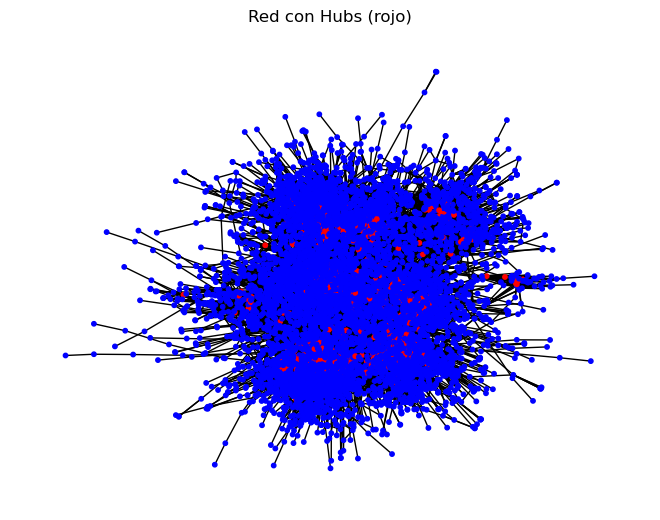

In [70]:
# Colorear hubs en rojo, otros en azul
node_colors = ['red' if node in hubs else 'blue' for node in G_asia.nodes()]

nx.draw(G_asia, pos, node_color=node_colors, with_labels=False, node_size=10)
plt.title("Red con Hubs (rojo)")
plt.show()

## 2.4 Scale-Free (4 puntos)

Calcule el coeficiente **gamma (γ)**, ajustando una power-law. Obtenga el coeficiente de determinación. ¿Qué tan bueno es el ajuste?

¿La red es scale-free? Justifique su respuesta.

**Respuesta:**

In [72]:
from scipy import stats

log_k = np.log(range(1, len(x) + 1))
log_pk = np.log(p)

slope, intercept, r_value, p_value, std_err = stats.linregress(log_k, log_pk)

gamma = -slope
print(f'El exponente de la ley de potencias (γ) es aproximadamente: {gamma:.4f}')



El exponente de la ley de potencias (γ) es aproximadamente: 2.0852


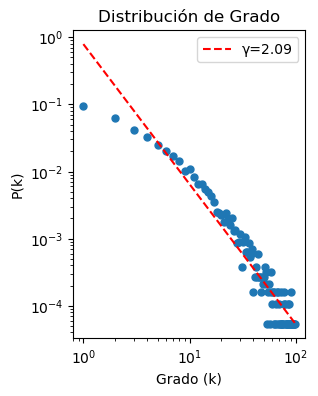

In [73]:
# Graficar la distribución de grado en una escala log-log
plt.figure(figsize=(3, 4))
plt.loglog(range(1, len(x) + 1), p, 'o', markersize=5)
plt.xlabel('Grado (k)')
plt.ylabel('P(k)')
plt.title('Distribución de Grado')

# Graficar la línea ajustada
plt.plot(np.exp(log_k), np.exp(intercept + slope * log_k), color='red', linestyle='--', label=f'γ={gamma:.2f}')
plt.legend()
plt.show()

In [74]:
# Coeficiente de determinación (R²), si es cercano a 1 tenemos un buen ajuste
r_squared = r_value**2
print(f"R²: {r_squared}")

R²: 0.9301423402898731


In [75]:
# p-value bajo (p-value < 0.05) sugiere una relación estadísticamente significativa
print(f"P-value: {p_value}")

P-value: 2.801174242798798e-57


## 2.5 Comparación de redes (4 puntos)

Utilizando las principales características de la red social analizada, cree dos grafos basados en los modelos Erdös-Rényi y Barabási-Albert.

* Para Erdös-Rényi: evalúe **p** en el intervalo 0 a p=0.001, seleccionando la probabilidad de tal manera que el grado promedio del grafo se aproxime al de la red social real.

* Para Barabási–Albert: evalúe **m** entre 1 y 20. Seleccione este parámetro de tal manera que el grado promedio del grafo creado se aproxime al de red social real.

Luego, en un mismo gráfico, muestre la distribución de grado de los tres grafos: red social real, Erdös-Rényi y Barabási–Albert. ¿Qué tipo de modelo de grafo se ajusta mejor al comportamiento de la red social? Justique.

**Respuesta:**

# Parte 3: Detección de comunidades (20 puntos)

En esta sección investigaremos e implementaremos métodos de detección de comunidades. Esta tarea resulta fundamental, ya que permite comprender cómo se organizan los nodos de un grafo en grupos con alta cohesión interna

## 3.1 Definiciones (2.5 Puntos)

Investigue y defina los siguientes conceptos relacionados con detección de comunidades en grafos:
* Algoritmo de Louvain
* Algoritmo de Leiden
* Modularidad
* Normalized Mutual Information (NMI)
* Adjusted Rand Index (ARI)

**Rsspuesta:**

## 3.2 Modelo LFR (2.5 Puntos)

Cree un grafo usando el modelo Lancichinetti-Fortunato-Radicchi con los siguientes hiperparámetros:

* n = 300
* tau1 = 3
* tau2 = 1.5
* mu = 0.2
* average_degree = 7
* min_community = 20
* seed = 10

¿Cuántas nodos, aristas y comunidades tiene el grafo?

**Respuesta:**

## 3.3 Implementación de algoritmos (5 Puntos)

Aplique los algoritmos de Louvain y Leiden al grafo obtenido en la sección anterior, y obtenga la partición de comunidades resultante de cada algoritmo.

*Nota:* Puede usar librerias externas que ya implementen estos algoritmos.

**Respuesta:**

## 3.4 Medición de la calidad de las comunidades (5 Puntos)

Calcule las métricas NMI y ARI para las particiones obtenidas por cada algoritmo. Comente sus resultados.

**Respuesta:**

## 3.5 Detección y representación de comunidades (5 Puntos)

Ejecute los algoritmos sobre alguno de los grafos de las secciones anteriores. Grafique el grafo coloreando los nodos según la partición obtenida y comente.

**Respuesta:**